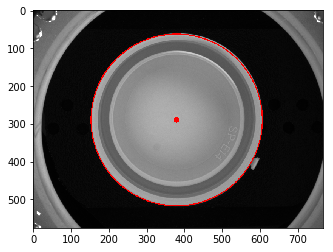

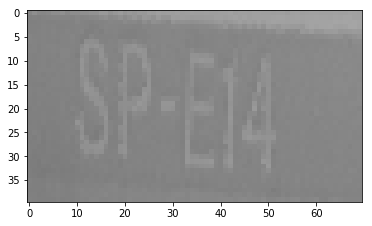

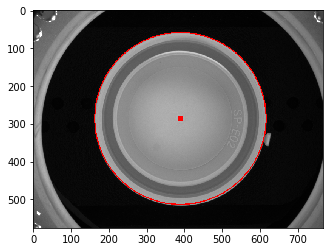

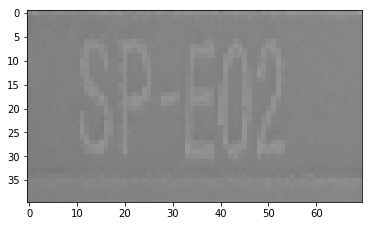

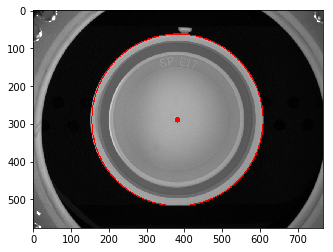

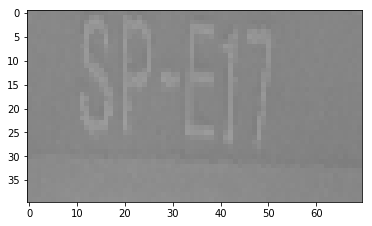

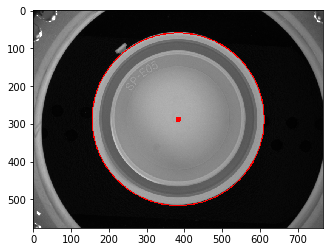

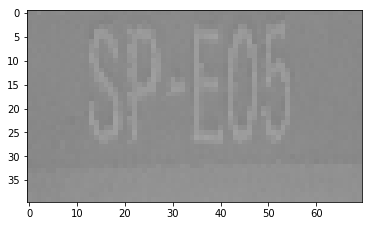

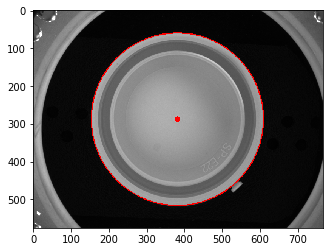

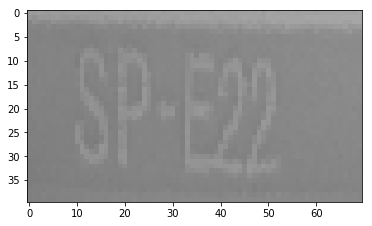

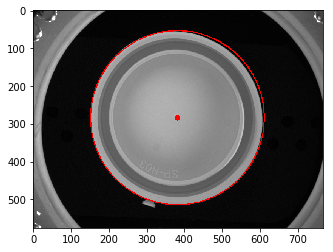

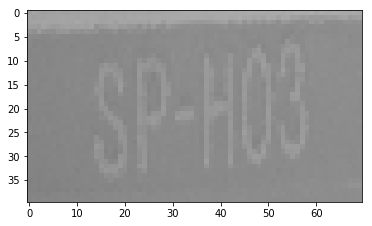

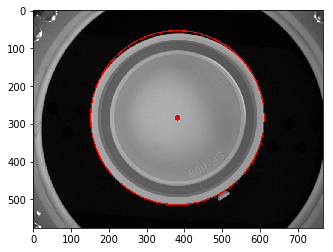

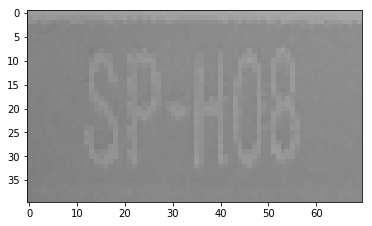

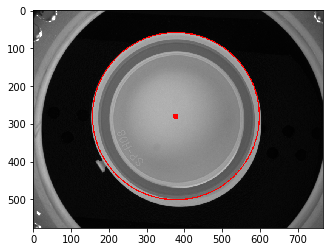

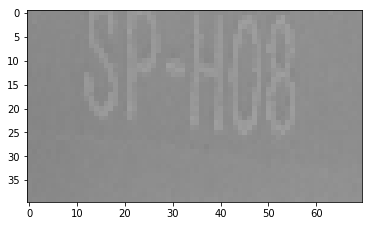

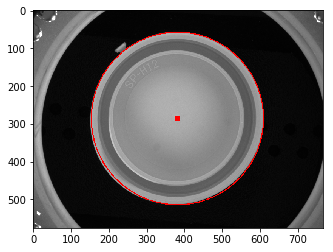

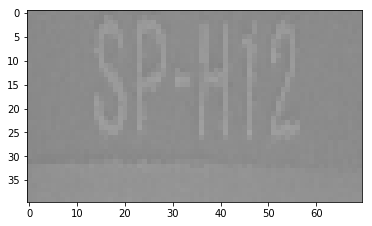

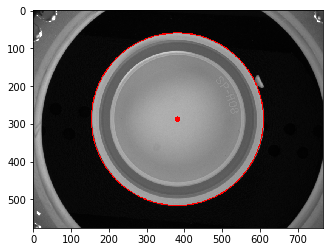

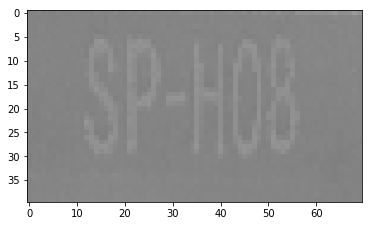

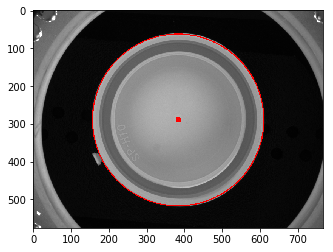

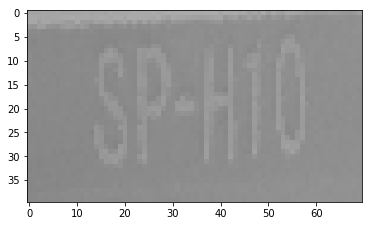

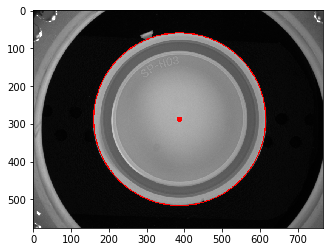

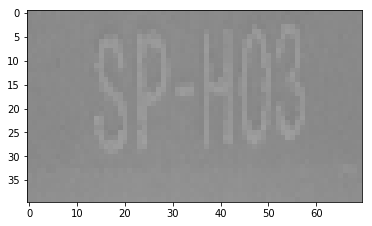

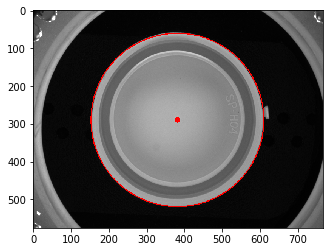

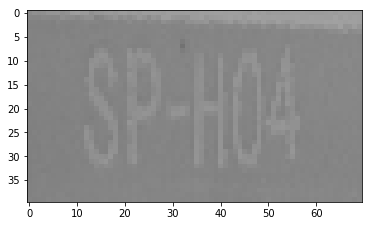

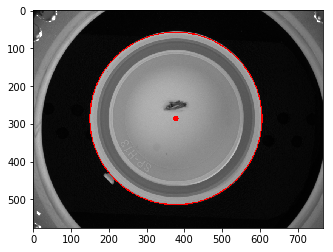

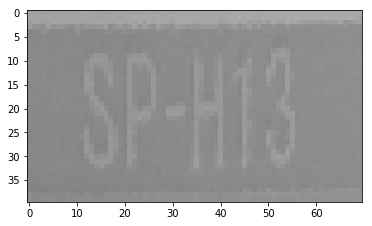

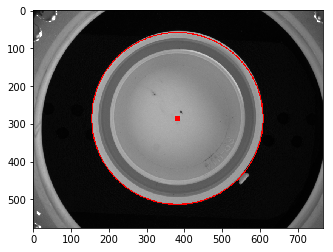

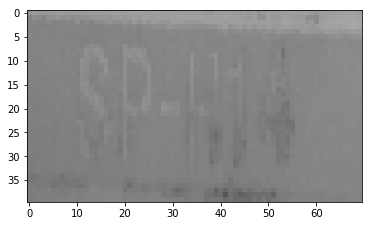

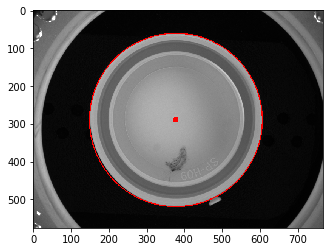

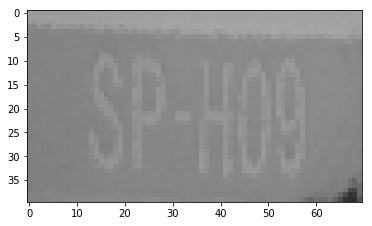

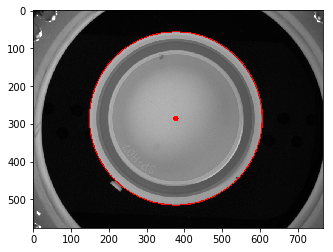

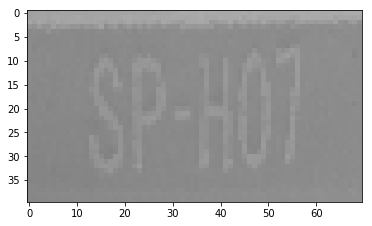

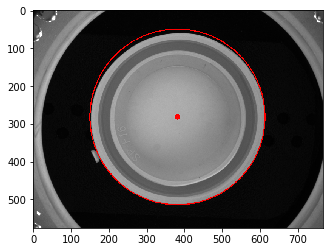

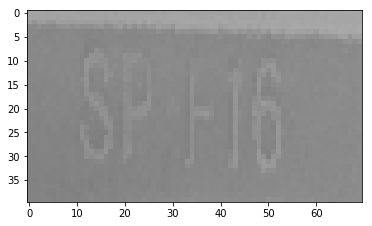

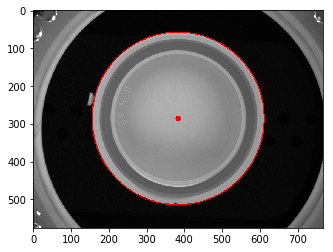

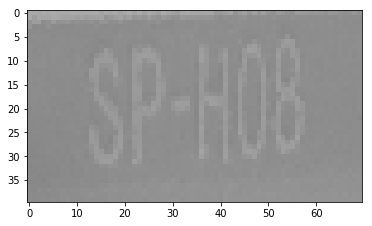

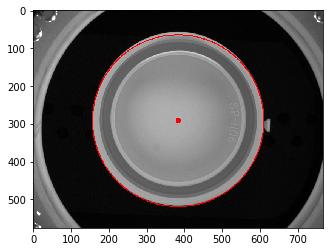

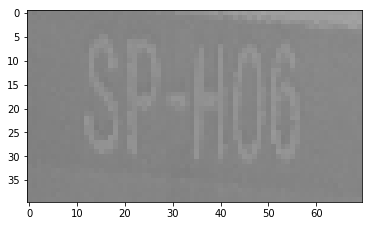

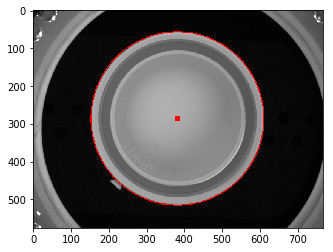

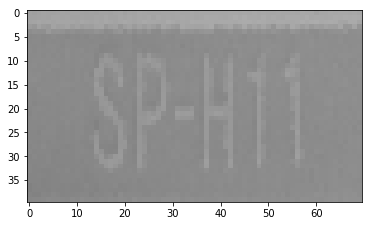

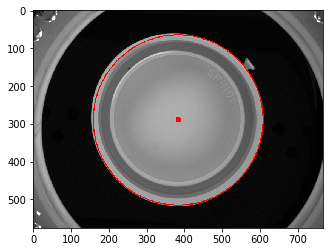

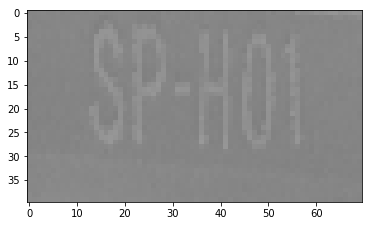

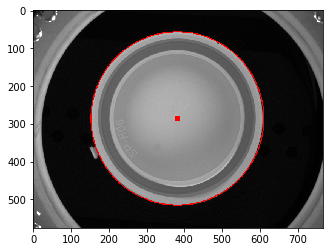

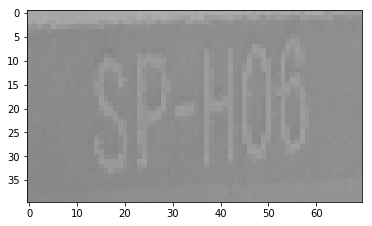

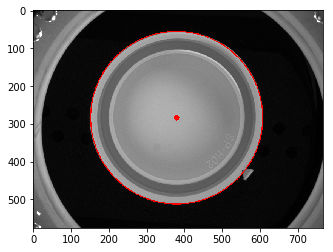

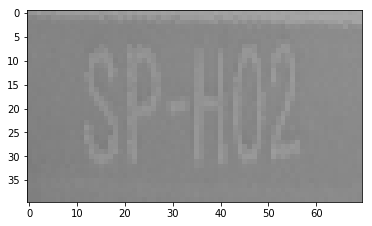

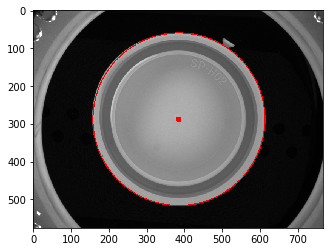

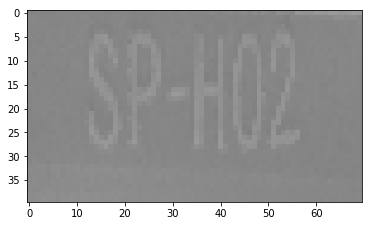

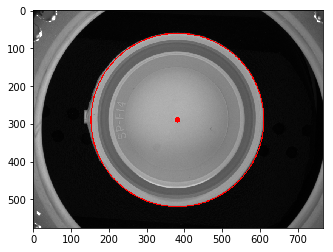

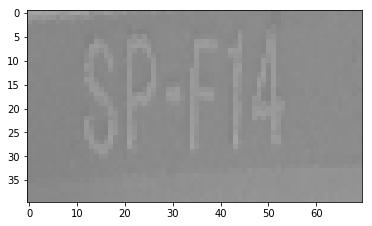

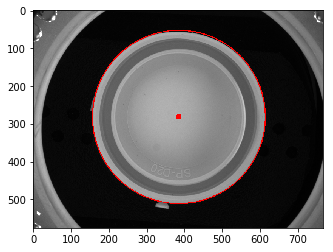

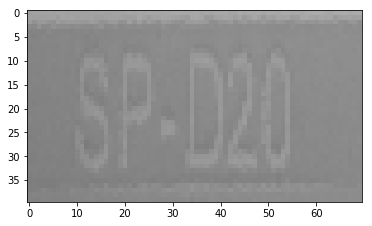

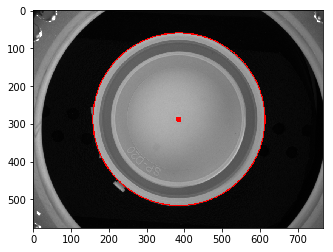

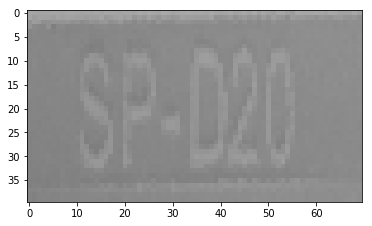

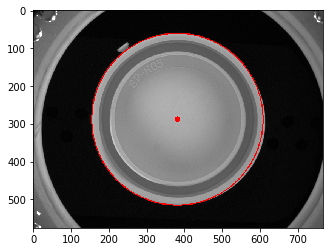

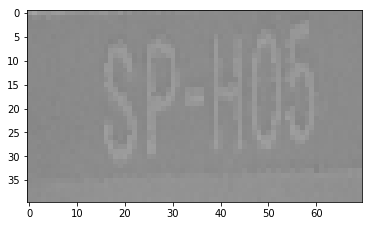

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

def cavityNumber(img):

    mimg = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # find the border of the cap
    circles = cv2.HoughCircles(mimg,cv2.HOUGH_GRADIENT,1,25,param1=150,param2=60,minRadius=220,maxRadius=300)
    if circles is not None:
        circles = np.uint16(np.around(circles))

    cap_c = circles[0][0]

    cv2.circle(img,(cap_c[0],cap_c[1]),cap_c[2],(255,0,0),2)
    cv2.circle(img,(cap_c[0],cap_c[1]),2,(255,0,0),10)

    plt.imshow(img,cmap='gray')
    plt.show()
    
    # find the annular region that contains the tab
    h,w = img.shape[:2]
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - cap_c[0])**2 + (Y-cap_c[1])**2)
    out_cap_mask = dist_from_center <= (cap_c[2]+10) 
    mask = dist_from_center >= (cap_c[2]+30)

    mimg[out_cap_mask] = 0
    mimg[mask] = 0
    
    # segmentation
    tval, mimg = cv2.threshold(mimg, 60, 255, type=cv2.THRESH_BINARY)
    
    # find the tab
    im2, contours, hierarchy = cv2.findContours(mimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    minCompactness = 1000000
    minIndex = -1
    for i in range(0,len(contours)):
        perimeter = cv2.arcLength(contours[i],True)
        area = cv2.contourArea(contours[i])
        if area > 0:
            compactness = perimeter**2 / area
            if compactness < minCompactness:
                minCompactness = compactness
                minIndex = i
    
    # calculate the barycenter of the tab
    moments = cv2.moments(contours[minIndex])
    bj = int(moments["m10"] / moments["m00"])
    bi = int(moments["m01"] / moments["m00"])
    
    # rotate the cap to put the tab on top
    orientation = 90+np.rad2deg(np.arctan2(bi-cap_c[1],bj-cap_c[0]))
    M = cv2.getRotationMatrix2D((cap_c[0],cap_c[1]), orientation, 1)
    rotated = cv2.warpAffine(img, M, (w, h))

    # apply the polar transform
    rotated = rotated[cap_c[1]-cap_c[2]:cap_c[1]+cap_c[2],cap_c[0]-cap_c[2]:cap_c[0]+cap_c[2]]
    rotated = cv2.warpPolar(rotated,(250,400),(cap_c[2],cap_c[2]),cap_c[2],cv2.WARP_POLAR_LINEAR)

    M = cv2.getRotationMatrix2D((125,200), 90, 1)
    rotated = cv2.warpAffine(rotated, M, (w, h))

    rotated = rotated[140:180,190:260]

    plt.imshow(rotated,cmap='gray')
    plt.show()

    
img1 = cv2.imread("images2/g_06.bmp")
img2 = cv2.imread("images2/g_07.bmp")
img3 = cv2.imread("images2/g_08.bmp")
img4 = cv2.imread("images2/g_09.bmp")
img5 = cv2.imread("images2/g_10.bmp")
img6 = cv2.imread("images2/d_02.bmp")
img7 = cv2.imread("images2/d_03.bmp")
img8 = cv2.imread("images2/d_04.bmp")
img9 = cv2.imread("images2/d_05.bmp")
img10 = cv2.imread("images2/d_06.bmp")
img11 = cv2.imread("images2/d_07.bmp")
img12 = cv2.imread("images2/d_08.bmp")
img13 = cv2.imread("images2/d_09.bmp")
img14 = cv2.imread("images2/d_10.bmp")
img15 = cv2.imread("images2/d_11.bmp")
img16 = cv2.imread("images2/d_12.bmp")
img17 = cv2.imread("images2/d_13.bmp")
img18 = cv2.imread("images2/d_14.bmp")
img19 = cv2.imread("images2/d_15.bmp")
img20 = cv2.imread("images2/d_16.bmp")
img21 = cv2.imread("images2/d_17.bmp")
img22 = cv2.imread("images2/d_18.bmp")
img23 = cv2.imread("images2/d_19.bmp")
img24 = cv2.imread("images2/d_20.bmp")
img25 = cv2.imread("images2/d_21.bmp")
img26 = cv2.imread("images2/d_22.bmp")
img27 = cv2.imread("images2/d_23.bmp")
img28 = cv2.imread("images2/d_24.bmp")
img29 = cv2.imread("images2/d_01.bmp")
    

cavityNumber(img1)
cavityNumber(img2)
cavityNumber(img3)
cavityNumber(img4)
cavityNumber(img5)
cavityNumber(img6)
cavityNumber(img7)
cavityNumber(img8)
cavityNumber(img9)
cavityNumber(img10)
cavityNumber(img11)
cavityNumber(img12)
cavityNumber(img13)
cavityNumber(img14)
cavityNumber(img15)
cavityNumber(img16)
cavityNumber(img17)
cavityNumber(img18)
cavityNumber(img19)
cavityNumber(img20)
cavityNumber(img21)
cavityNumber(img22)
cavityNumber(img23)
cavityNumber(img24)
cavityNumber(img25)
cavityNumber(img26)
cavityNumber(img27)
cavityNumber(img28)
cavityNumber(img29)